## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import tensorflow.keras as keras
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
earlystop_monitor = 'val_accuracy'
earlystop_patience = [10, 25]

In [7]:
results = {}

for i in earlystop_patience:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("earlystop patience: %i" % i)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    earlystop = EarlyStopping(monitor=earlystop_monitor, patience=i, verbose=1)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    exp_name_tag = ("earlystop-patience-%s" % str(i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

earlystop patience: 10
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v2 (Batc (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25

Epoch 43/50
50000/50000 [==============================] - 8s 159us/sample - loss: 1.3230 - accuracy: 0.5262 - val_loss: 1.3586 - val_accuracy: 0.5163
Epoch 44/50
50000/50000 [==============================] - 8s 166us/sample - loss: 1.3151 - accuracy: 0.5295 - val_loss: 1.3415 - val_accuracy: 0.5233
Epoch 45/50
50000/50000 [==============================] - 9s 180us/sample - loss: 1.3034 - accuracy: 0.5363 - val_loss: 1.3422 - val_accuracy: 0.5233
Epoch 46/50
50000/50000 [==============================] - 9s 187us/sample - loss: 1.3003 - accuracy: 0.5341 - val_loss: 1.3340 - val_accuracy: 0.5233
Epoch 47/50
50000/50000 [==============================] - 8s 154us/sample - loss: 1.2964 - accuracy: 0.5397 - val_loss: 1.3504 - val_accuracy: 0.5185
Epoch 48/50
50000/50000 [==============================] - 9s 176us/sample - loss: 1.2911 - accuracy: 0.5392 - val_loss: 1.3396 - val_accuracy: 0.5205
Epoch 49/50
50000/50000 [==============================] - 10s 200us/sample - loss: 1.2816 - a

Epoch 35/50
50000/50000 [==============================] - 8s 162us/sample - loss: 1.3713 - accuracy: 0.5112 - val_loss: 1.3648 - val_accuracy: 0.5111
Epoch 36/50
50000/50000 [==============================] - 10s 193us/sample - loss: 1.3615 - accuracy: 0.5163 - val_loss: 1.3641 - val_accuracy: 0.5089
Epoch 37/50
50000/50000 [==============================] - 10s 198us/sample - loss: 1.3553 - accuracy: 0.5176 - val_loss: 1.3595 - val_accuracy: 0.5120
Epoch 38/50
50000/50000 [==============================] - 11s 211us/sample - loss: 1.3502 - accuracy: 0.5183 - val_loss: 1.3564 - val_accuracy: 0.5165
Epoch 39/50
50000/50000 [==============================] - 10s 192us/sample - loss: 1.3394 - accuracy: 0.5204 - val_loss: 1.3600 - val_accuracy: 0.5173
Epoch 40/50
50000/50000 [==============================] - 10s 198us/sample - loss: 1.3384 - accuracy: 0.5228 - val_loss: 1.3589 - val_accuracy: 0.5171
Epoch 41/50
50000/50000 [==============================] - 10s 208us/sample - loss: 1.326

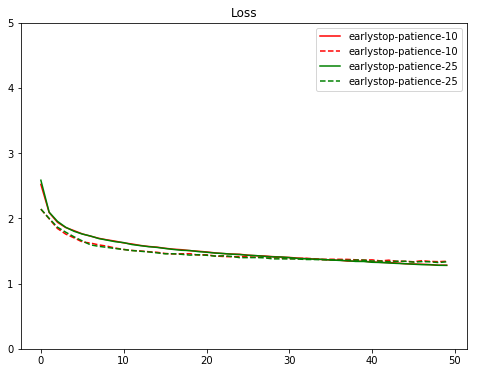

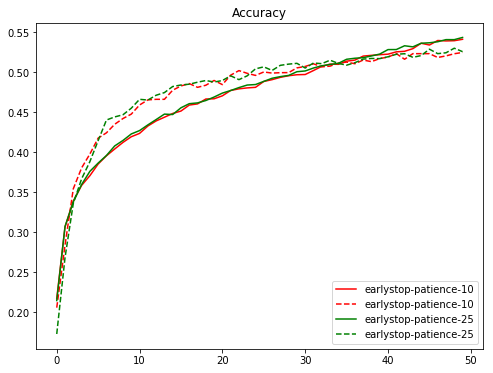

In [8]:
color_bar = ["r", "g", "b", "y", "m", "k", "grey", "brown", "pink"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()